# Loading Libraries and Explore the Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset Selection

In [6]:
df=pd.read_csv("/content/drive/MyDrive/sales_data.csv")
df.head()

,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop,North,1500,300,0.10,Electronics,2023-01-01
1,Smartphone,South,800,150,0.05,Electronics,2023-01-02
2,Headphones,East,200,50,0.15,Accessories,2023-01-03
3,Desk,West,350,80,0.20,Furniture,2023-01-04
4,Chair,North,120,30,0.10,Furniture,2023-01-05


#Data Cleaning:

In [7]:

df.drop_duplicates(inplace=True)
df.shape


(15, 7)

In [8]:

numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])



#Exploratory Data Analysis:


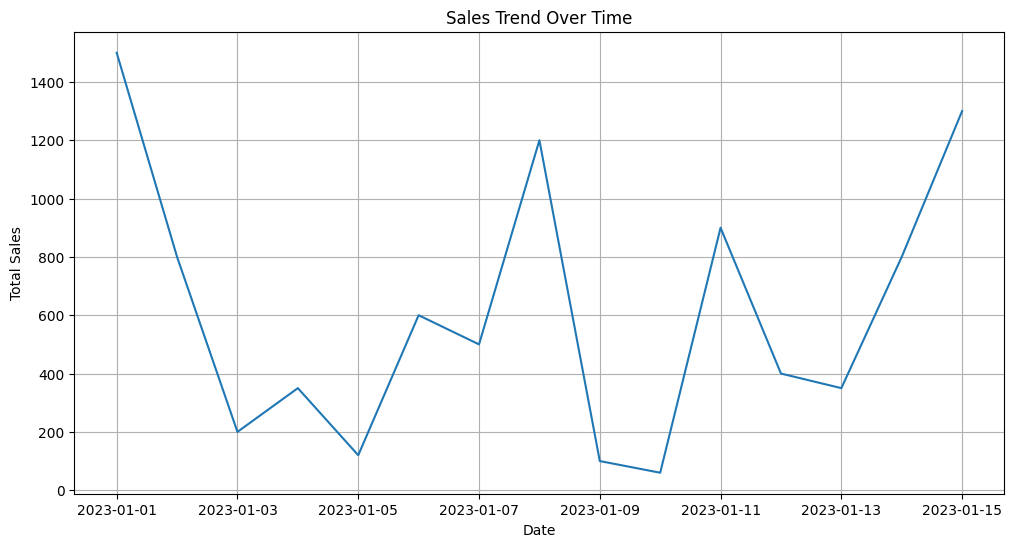

In [10]:

# Group sales by date and sum
sales_by_date = df.groupby('Date')['Sales'].sum()

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.grid(True)
plt.show()


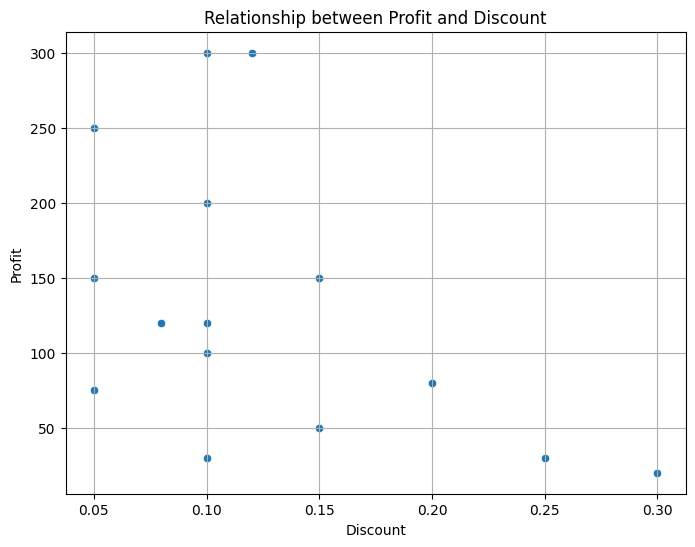

In [11]:

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Relationship between Profit and Discount')
plt.grid(True)
plt.show()


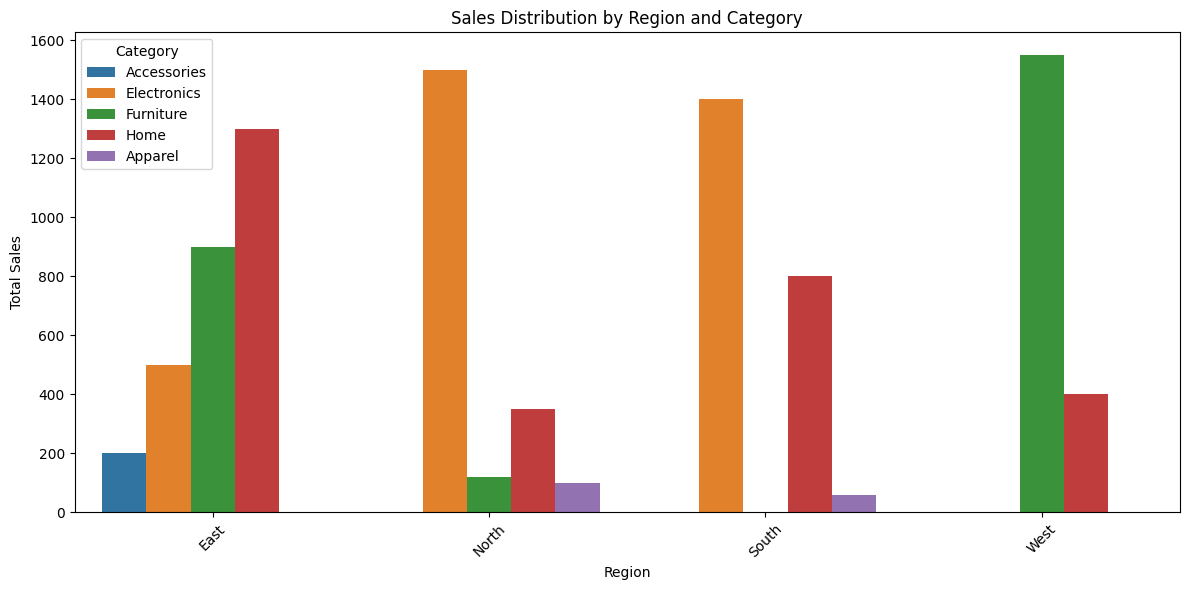

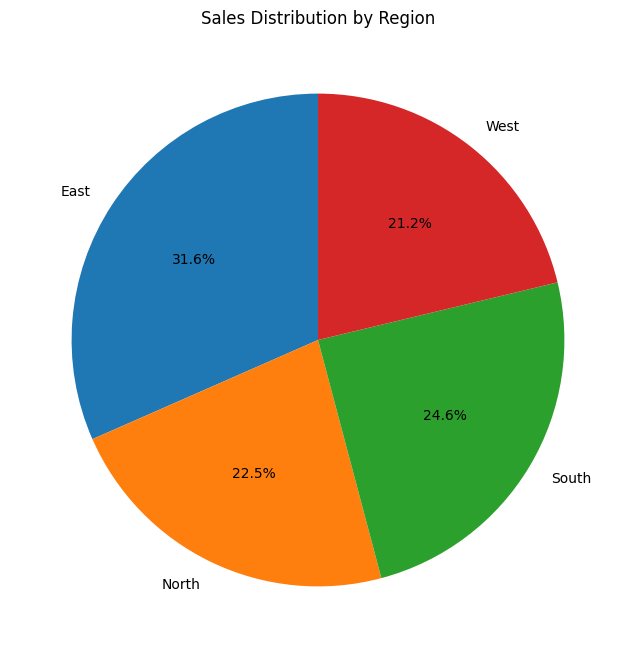

In [12]:
# Group sales by region and category, then sum
sales_by_region_category = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Bar plot of sales distribution by region and category
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', hue='Category', data=sales_by_region_category)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Region and Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculated sales percentage by region for pie chart
sales_by_region = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region')
plt.show()


In [13]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 6821.329552535558
R-squared: 0.9819392898408978


# Predictive Modeling:

In [14]:

new_data = pd.DataFrame({'Profit': [1000, 2000], 'Discount': [0.1, 0.2]})
new_predictions = model.predict(new_data)
print(f"New Predictions: {new_predictions}")


New Predictions: [4555.09070791 9049.45699618]
